In [4]:
pip install tensorflow

     -------------------------------------- 266.3/266.3 MB 2.4 MB/s eta 0:00:00
     -------------------------------------- 895.9/895.9 kB 6.3 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 4.5 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 3.7 MB/s eta 0:00:00
     -------------------------------------- 439.2/439.2 kB 9.1 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 3.8 MB/s eta 0:00:00
     ---------------------------------------- 14.2/14.2 MB 3.5 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 4.5 MB/s eta 0:00:00
     -------------------------------------- 124.6/124.6 kB 7.1 MB/s eta 0:00:00
     ---------------------------------------- 6.0/6.0 MB 3.7 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB ? eta 0:00:00
     ------------------------------------- 177.0/177.0 kB 11.1 MB/s eta 0:00:00
     -------------------------------------- 781.3/781.3

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model



In [2]:
data = tf.keras.datasets.cifar10

In [3]:
(x_train, y_train), (x_test, y_test) = data.load_data()


In [4]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [5]:
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()

In [6]:
K = len(set(y_train))
print("number of classes:", K)


number of classes: 10


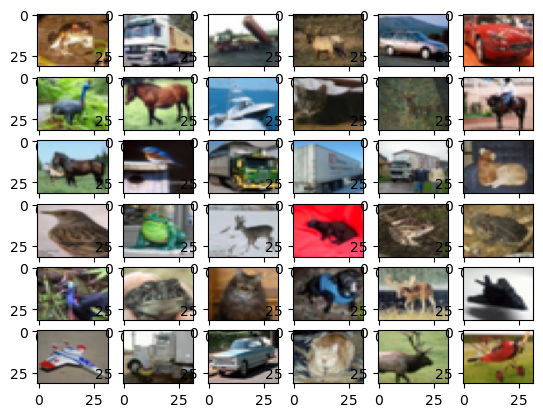

In [7]:
fig, ax = plt.subplots(6, 6)
a = 0
 
for i in range(6):
    for j in range(6):
        ax[i][j].imshow(x_train[a], aspect='auto')
        a += 1
 
plt.show()

In [8]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)



In [9]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0     

In [10]:

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [11]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20)

Epoch 1/20
1563/1563 [==============================] - 287s 182ms/step - loss: 1.3047 - accuracy: 0.5503 - val_loss: 1.0975 - val_accuracy: 0.6222
Epoch 2/20
1563/1563 [==============================] - 297s 190ms/step - loss: 0.8338 - accuracy: 0.7136 - val_loss: 0.7600 - val_accuracy: 0.7440
Epoch 3/20
1563/1563 [==============================] - 311s 199ms/step - loss: 0.6795 - accuracy: 0.7643 - val_loss: 0.7144 - val_accuracy: 0.7660
Epoch 4/20
1563/1563 [==============================] - 1322s 846ms/step - loss: 0.5777 - accuracy: 0.8012 - val_loss: 0.7202 - val_accuracy: 0.7647
Epoch 5/20
1563/1563 [==============================] - 307s 196ms/step - loss: 0.4916 - accuracy: 0.8304 - val_loss: 0.6315 - val_accuracy: 0.7984
Epoch 6/20
1563/1563 [==============================] - 1814s 1s/step - loss: 0.4258 - accuracy: 0.8528 - val_loss: 0.6369 - val_accuracy: 0.8000
Epoch 7/20
1563/1563 [==============================] - 314s 201ms/step - loss: 0.3521 - accuracy: 0.8792 - val_l

In [13]:
batch= 32
dg= tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
tg = dg.flow(x_train, y_train, batch)
epoch = x_train.shape[0] // batch
res = model.fit(tg, validation_data=(x_test, y_test),steps_per_epoch=epoch, epochs=5)

Epoch 1/5
1562/1562 [==============================] - 277s 176ms/step - loss: 0.5908 - accuracy: 0.8093 - val_loss: 0.5628 - val_accuracy: 0.8203
Epoch 2/5
1562/1562 [==============================] - 270s 173ms/step - loss: 0.4830 - accuracy: 0.8405 - val_loss: 0.5539 - val_accuracy: 0.8195
Epoch 3/5
1562/1562 [==============================] - 6748s 4s/step - loss: 0.4378 - accuracy: 0.8514 - val_loss: 0.4791 - val_accuracy: 0.8401
Epoch 4/5
1562/1562 [==============================] - 326s 208ms/step - loss: 0.4158 - accuracy: 0.8586 - val_loss: 0.4900 - val_accuracy: 0.8378
Epoch 5/5
1562/1562 [==============================] - 2445s 2s/step - loss: 0.3985 - accuracy: 0.8652 - val_loss: 0.5684 - val_accuracy: 0.8246


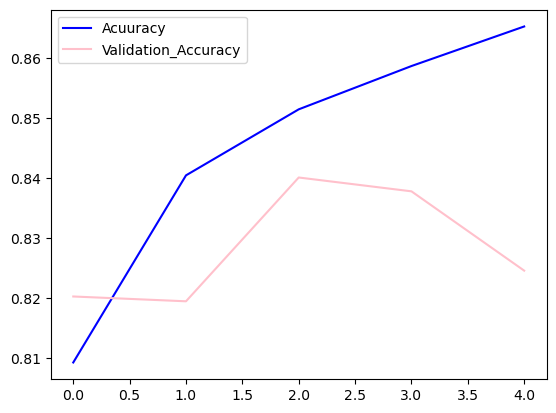

In [31]:
plt.plot(res.history['accuracy'], label='Acuuracy', color='blue')
plt.plot(res.history['val_accuracy'], label='Validation_Accuracy', color='pink')
plt.legend()

In [26]:
labels = '''airplane automobile bird cat deer dog frog horse ship truck '''.split()
img_no = 0


In [27]:
test = np.array(x_test[img_no])

In [28]:
test1 = test.reshape(1, 32, 32, 3)

In [29]:
output_label = labels[model.predict(test1).argmax()]
input_label = labels[y_test[img_no]]

1/1 [==============================] - 0s 54ms/step


Input label is cat and output label is cat


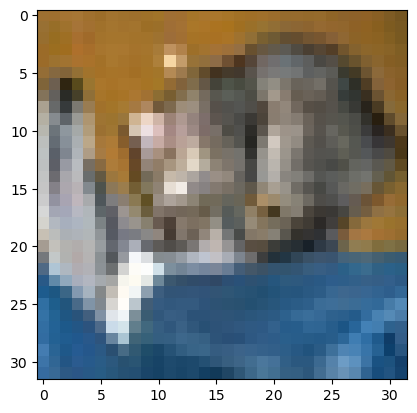

In [30]:
plt.imshow(x_test[img_no])
print("Input label is {} and output label is {}".format(input_label, output_label))